In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
from pyarrow import parquet 
import numpy as np
import sys 
sys.path.append('/home/bekah/gPhoton2')
from gPhoton.pipeline import execute_pipeline
from astropy.io import fits
import os 

In [2]:
# load image data 

data = fits.open("/home/bekah/glcat/fuv_offset/e23330/e23330-fd-b00-f0025-t00000-g_dose.fits.gz")

In [41]:
center_pixel = 2310
row = 2103

Text(0, 0.5, 'pixel value')

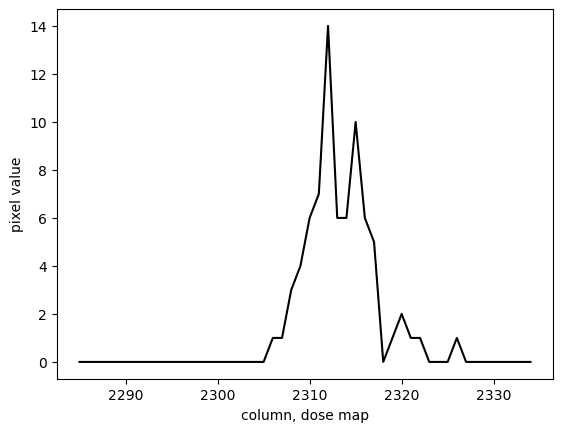

In [42]:
plt.plot(range(center_pixel-25,center_pixel+25),data[0].data[row,center_pixel-25:center_pixel+25], 'k')
plt.xlabel('column, dose map')
plt.ylabel('pixel value')

TypeError: scatter() missing 1 required positional argument: 'y'

In [85]:
# to make plots of histograms of cross section of dose map spirals (basically fwhm)
# with bounding box coordinates 

def make_cross_section_plots(data, bounding_box): 
    
    number_rows = bounding_box['rowmax']-bounding_box['rowmin']
    
    fig, axes = plt.subplots(number_rows, 1, figsize=(4, 2*number_rows), sharex=True)
    plt.setp(axes, ylim=(0,15))    
    center_pixel = bounding_box['center_pixel']
    
    for i, row in enumerate( range(bounding_box['rowmin'],bounding_box['rowmax'])):
        axes[i].plot(range(-25,25),data[0].data[row,center_pixel-25:center_pixel+25], 'k')
    plt.xlabel('column, dose map')
    plt.ylabel('pixel value')
    plt.tight_layout()
    return fig 

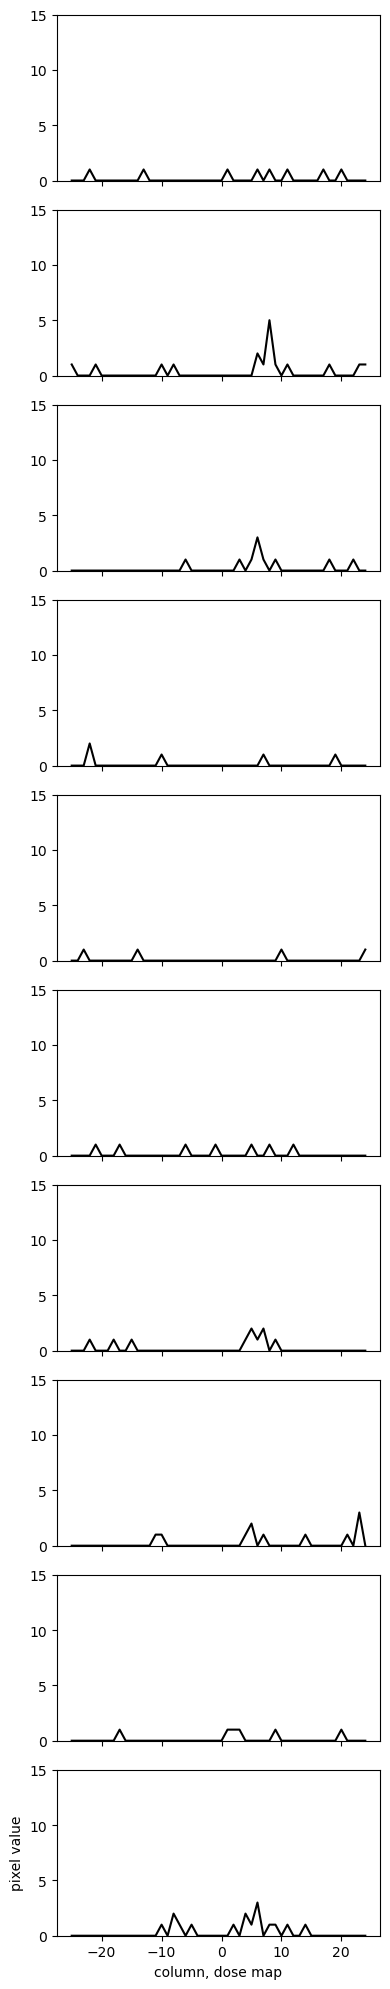

In [99]:
# in saoimage, 
# the x and y coordinate are flipped compared to in here 
bounding_box = {'center_pixel':2588 , 'rowmin':4917 , 'rowmax':4927 }

fig = make_cross_section_plots(data, bounding_box)

In [93]:
def make_cross_section_plots_same_plot(data, bounding_box): 
    
    number_rows = bounding_box['rowmax']-bounding_box['rowmin']
    
    plt.ylim((0,15))    
    center_pixel = bounding_box['center_pixel']
    
    for i, row in enumerate( range(bounding_box['rowmin'],bounding_box['rowmax'])):
        plt.plot(range(-25,25),data[0].data[row,center_pixel-25:center_pixel+25], lw=.5)
    plt.xlabel('column, dose map')
    plt.ylabel('pixel value')
    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/matplotlib/pyplot.py'>

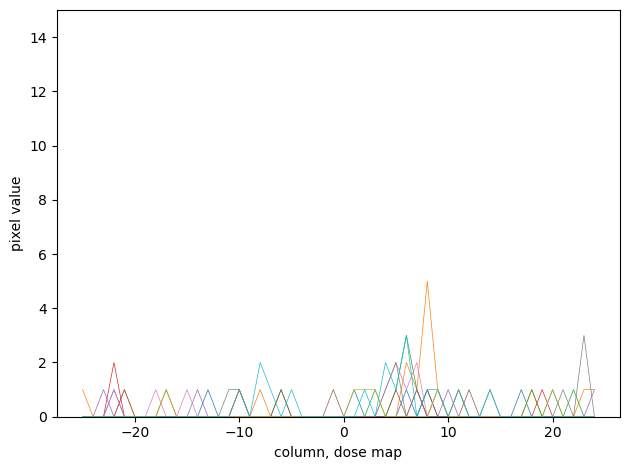

In [100]:
make_cross_section_plots_same_plot(data, bounding_box)

In [105]:
segs

,b1,b2,b3,b4
0,2592.0699,4924.4419,112.190810,134.294080
1,2858.3138,5101.6029,24.447551,39.183061
2,2050.8405,4805.3833,18.372874,32.326955
3,1960.0227,4646.6556,20.931122,31.629251
4,2206.6193,4487.6230,17.675170,33.722363
...,...,...,...,...
157,4657.0319,3491.3055,23.148147,40.509256
158,4789.8444,3539.3379,27.199072,34.722220
159,5098.5365,3466.1435,41.666664,57.499996
160,4824.7865,3624.0602,24.166665,33.333331


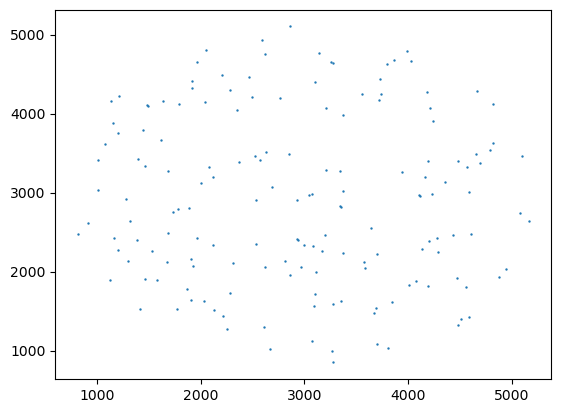

In [108]:
plt.scatter(segs['b1'],segs['b2'],s=.5)


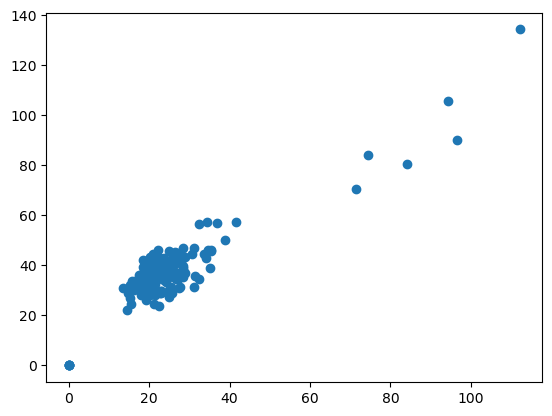

In [107]:
plt.scatter(segs['b3'],segs['b4'])

In [ ]:
from matplotlib.collections import PatchCollection
import matplotlib
import matplotlib.pyplot as plt
import random
patches = []
for i in range(0,n):
    patches.append(matplotlib.patches.Rectangle((x, y),1,1,))
plt.add_collection(PatchCollection(patches))
plt.show()

In [4]:
segs = pd.read_csv("/home/bekah/glcat/fuv_offset/segs.csv")

In [2]:
data = fits.open("/home/bekah/glcat/fuv_offset/e23330/e23330-nd-b00-f0025-t00000-g_dose.fits.gz")
data_f = fits.open("/home/bekah/glcat/fuv_offset/e23330/e23330-fd-b00-f0025-t00000-g_dose.fits.gz")

In [145]:
def make_cross_section_plots_same_plot(data, boxes): 
    for row in range(len(segs)):
        center_pixel = int(segs.iloc[row]['b1'])
        row = int(segs.iloc[row]['b2'])
        plt.plot(range(-40,40),data[0].data[row,center_pixel-40:center_pixel+40], '.',lw=.5)
        plt.plot(range(-40,40),data[0].data[row-1,center_pixel-40:center_pixel+40], '.',lw=.5)
        plt.plot(range(-40,40),data[0].data[row+1,center_pixel-40:center_pixel+40], '.',lw=.5)
    plt.xlabel('column, dose map')
    plt.ylabel('pixel value')
    plt.ylim=(2,15)   

    plt.tight_layout()
    return plt

<module 'matplotlib.pyplot' from '/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/matplotlib/pyplot.py'>

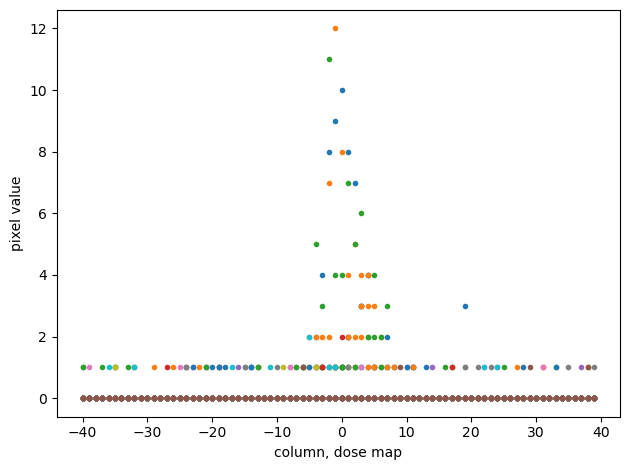

In [146]:
make_cross_section_plots_same_plot(data_f, segs)

In [121]:
segs.iloc[0]['b2']

4924.4419

couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit


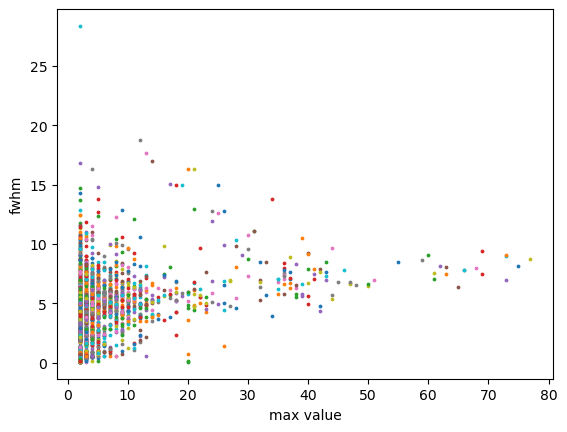

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

for row in range(len(segs)):
    for var in [-12,-11,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11,12]:
        center_pixel = int(segs.iloc[row]['b1'])
        rowd = int(segs.iloc[row]['b2'])
        rowd = rowd + var
        offset = 30
        x_data = range(-offset,offset)
        y_data = data[0].data[rowd,center_pixel-offset:center_pixel+offset]
        # Fit the Gaussian function to the data
        if max(y_data) > 1: 
            try:
                popt, _ = curve_fit(gaussian, x_data, y_data, p0=[1, 0, 1])

                # Calculate the FWHM from the fitted parameters
                fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]
                maxy = max(y_data)
                if fwhm < 25:
                        plt.scatter(maxy,abs(fwhm),s=3)
                        plt.ylabel("fwhm")
                        plt.xlabel("max value")
            except: 
                print("couldn't fit")


In [204]:

def poisson(x, mu):
    return (np.exp(-mu) * mu**x) / np.math.factorial(x)

for row in range(len(segs)):
    for var in [3,-3,-2,2,1,-1,0]:
        center_pixel = int(segs.iloc[row]['b1'])
        rowd = int(segs.iloc[row]['b2'])
        rowd = rowd + var
        offset = 30
        x_data = range(-offset,offset)
        y_data = data[0].data[rowd,center_pixel-offset:center_pixel+offset]
        try:
                popt, _ = curve_fit(poisson, x_data, y_data, p0=[1])
                #plt.plot(x_data, y_data, 'b-', label='data', lw=0.5)
                plt.plot(x_data, poisson(x_data, *popt), 'g--', lw=0.5)
        except: 
                print("couldn't fit")

couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit
couldn't fit

In [194]:
len(segs)

162

In [164]:
def fit_and_plot(x_data, y_data, ax):
    popt, _ = curve_fit(gaussian, x_data, y_data, p0=[1, 0, 1])
    ax.plot(x_data, y_data)
    ax.plot(x_data, gaussian(x_data, *popt), 'r-', label='Fit')
    ax.axvline(x=popt[1] - 2 * np.sqrt(2 * np.log(2)) * popt[2], color='gray', linestyle='--', label='FWHM')
    ax.axvline(x=popt[1] + 2 * np.sqrt(2 * np.log(2)) * popt[2], color='gray', linestyle='--')
    ax.grid(True)

In [66]:
import pyregion
region_name = "/media/bekah/BekahA/backplane_widths/e23068/regions_n_t25.reg"
r = pyregion.open(region_name)



In [184]:
r[3]

Shape : box ( Number(3675.6528),Number(3334.6806),Number(36.805556),Number(28.472222),Number(0) )

In [67]:
image = fits.open("/media/bekah/BekahA/backplane_widths/e23068/e23068-nd-b00-f0025-t00250-g_dose.fits.gz")

In [123]:
num = 25
width = 20
y = round(r[num].coord_list[0])
x = round(r[num].coord_list[1])

cutout = image[0].data[x-width:x+width,y-width:y+width]

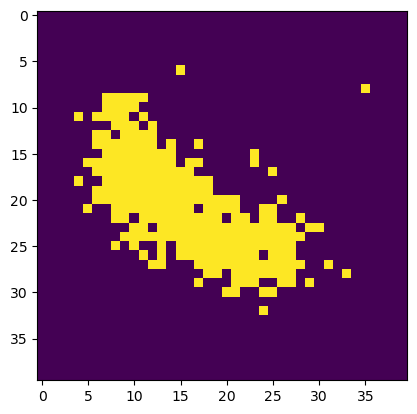

In [124]:
plt.imshow(cutout>1, interpolation=None)

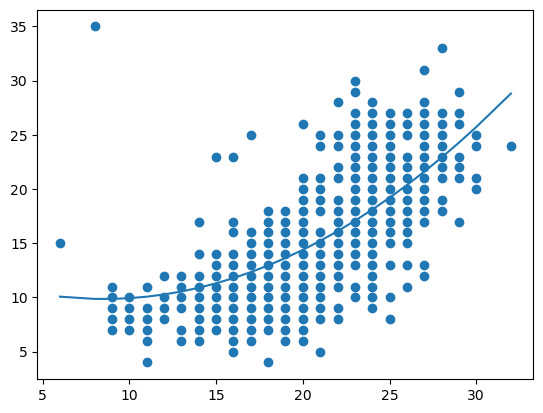

In [141]:
rows, cols = np.where(cutout>1)
fit = np.polyfit(rows, cols, 2)
f = np.poly1d(fit)

plt.scatter(rows,cols)
plt.plot(rows,f(rows))
plt.show()

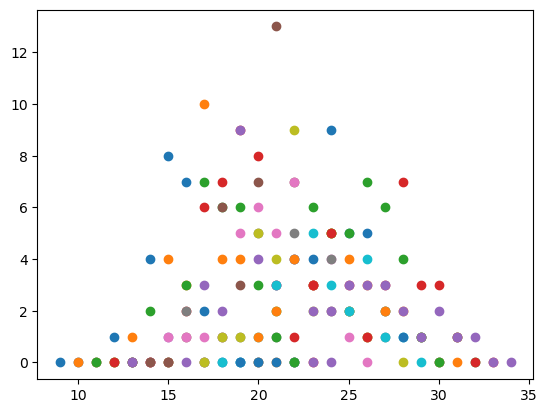

In [182]:
def perp_line(m, x1, y1, x): 
    y = m*(x-x1) + y1 
    return y

rows, cols = np.where(cutout>1)
fit = np.polyfit(rows, cols, 2)
f = np.poly1d(fit)


x_vals = range(15,30)

for x_val in x_vals: 
    
    deriv = f.deriv()
    slope_of_normal = -1/deriv(x_val)
    y1 = f(x_val)
    x1= x_val
    xr = range(x_val-6,x_val+6)


    y = [round(perp_line(slope_of_normal, x1, y1, x)) for x in xr]
    
    #plt.scatter(xr, y, marker ='x')
    coords = list(zip(xr,y))
    crosscut = [cutout[c[0],c[1]] for c in coords]
    plt.scatter(xr,crosscut)

#plt.scatter(rows,cols,s=6)
#plt.plot(rows,f(rows))
#plt.axis('scaled')
#plt.xlim(0,40)
#plt.ylim(0,40)
plt.show()

In [133]:
slope_of_normal = -1/deriv(15)

In [135]:
f(15)

11.30550906768825

In [134]:
slope_of_normal

-2.24173337381822

In [254]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pyregion

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def perp_line(m, x1, y1, x): 
    y = m*(x-x1) + y1 
    return y 

def per_star(r, image, num): 
    
    width = 16
    
    y = round(r[num].coord_list[0])
    x = round(r[num].coord_list[1])

    cutout = image[0].data[x-width:x+width,y-width:y+width]
    rows, cols = np.where(cutout>1)
    fit = np.polyfit(rows, cols, 2)
    f = np.poly1d(fit)

    starlist = []
    
    x_vals = range(round(cutout.shape[0]/2-5),round(cutout.shape[0]/2+5))
    
    for x_val in x_vals: 

        deriv = f.deriv()
        slope_of_normal = -1/deriv(x_val)
        y1 = f(x_val)
        x1= x_val
        xr = range(x_val-8,x_val+12)

        y = [round(perp_line(slope_of_normal, x1, y1, x)) for x in xr]
        y = [31 if a >= 32 else 0 if a <= 0 else a for a in y]
        #plt.scatter(xr, y, marker ='x')
        coords = list(zip(xr,y))
        crosscut = [cutout[c[0],c[1]] for c in coords]
        
        try:
            popt, _ = curve_fit(gaussian, xr, crosscut, p0=[1, 0, 1])

            # Calculate the FWHM from the fitted parameters
            fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]
            maxy = max(crosscut)
        except: 
            fwhm = 999
            maxy = 999
            
        row = {'star': num, 'x_val': x_val, 'fwhm': fwhm, 'maxy': maxy, 'crosscut': crosscut} 
        
        starlist.append(row.copy())

        
    star_data = pd.DataFrame(starlist)
    
    return star_data 
        
def per_eclipse(eclipse, time): 
    
    image = fits.open(f"/media/bekah/BekahA/backplane_widths/e{eclipse}/e{eclipse}-nd-b00-f00{time}-t00{time}0-g_dose.fits.gz")
    region_name = f"/media/bekah/BekahA/backplane_widths/e{eclipse}/regions_n_t{time}.reg"
    r = pyregion.open(region_name)
    
    combined_results = []

    for star in range(len(r)): 
        try: 
            star_data = per_star(r, image, star)
            combined_results.append(star_data)
        except: 
            print("Poor fit.")
        
    eclipse_results = pd.concat(combined_results, axis=0)


    return eclipse_results 

In [255]:
results = per_eclipse('23068', '25')

/home/bekah/mambaforge/envs/gphoton2/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.


/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


Poor fit.
Poor fit.
Poor fit.
Poor fit.
Poor fit.


/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)
/tmp/ipykernel_11844/1434312866.py:72: RankWarning: Polyfit may be poorly conditioned
  star_data = per_star(r, image, star)


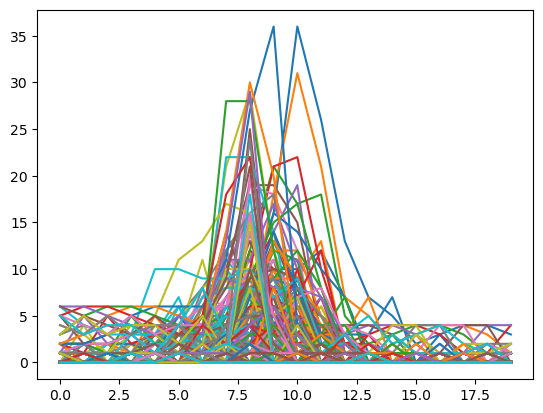

In [251]:
length = len(results)

for x in range(length): 
    plt.plot(range(20),results['crosscut'].iloc[x])

In [246]:
popt, _ = curve_fit(gaussian, range(20),results['crosscut'].iloc[78], p0=[1, 0, 1])

# Calculate the FWHM from the fitted parameters
fwhm = 2 * np.sqrt(2 * np.log(2)) * popt[2]
maxy = max(results['crosscut'].iloc[45])


In [247]:
fwhm

2.3548200479244428

In [248]:
maxy

2.0

In [256]:
results

,star,x_val,fwhm,maxy,crosscut
0,0,11,2.35482,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
1,0,12,2.35482,2.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2.0, ..."
2,0,13,2.35482,1.0,"[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, ..."
3,0,14,2.35482,4.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, ..."
4,0,15,2.35482,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ..."
...,...,...,...,...,...
5,136,16,2.35482,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."
6,136,17,2.35482,1.0,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
7,136,18,2.35482,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,136,19,2.35482,1.0,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


(array([   8., 1269.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          23.]),
 array([-181.55383837,  -63.49845453,   54.55692931,  172.61231314,
         290.66769698,  408.72308082,  526.77846465,  644.83384849,
         762.88923233,  880.94461616,  999.        ]),
 <BarContainer object of 10 artists>)

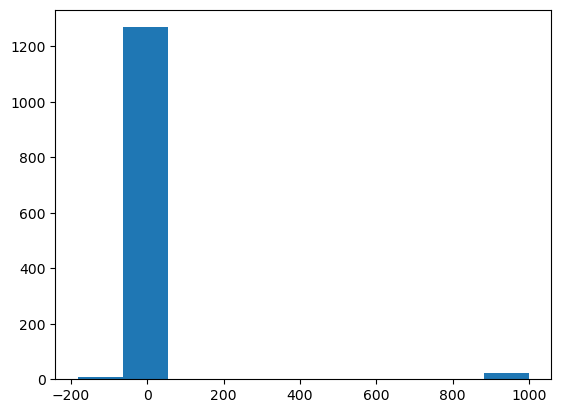

In [253]:
plt.hist(results['fwhm'])